#1. Dataset: Forest Fires 

Descripción: Se trata de una tarea de regresión, donde el objetivo es predecir el área quemada por incendios forestales, en la región noreste de Portugal, utilizando datos meteorológicos y de otro tipo.

-Instancias: 517

-Atributos: 12 (parámetros de entrada del modelo climático)

-Output: área

1. X - coordenada espacial del eje x dentro del mapa del parque Montesinho: 1 a 9
2. Y - coordenada espacial del eje y dentro del mapa del parque Montesinho: 2 a 9
3. mes - mes del año: 'jan' a 'dic'
4. día - día de la semana: 'mon' a 'sun'
5. FFMC - Índice FFMC del sistema FWI: 18,7 a 96,20
6. DMC - Índice DMC del sistema FWI: 1.1 a 291.3
7. DC - Índice DC del sistema FWI: 7,9 a 860,6
8. ISI - Índice ISI del sistema FWI: 0.0 a 56.10
9. temp - temperatura en grados Celsius: 2.2 a 33.30
10. RH - humedad relativa en%: 15.0 a 100
11. viento - velocidad del viento en km / h: 0,40 a 9,40
12. lluvia - lluvia exterior en mm / m2: 0.0 a 6.4
13. área - el área quemada del bosque (en ha): 0.00 a 1090.84

Más información sobre el dataset:https://archive.ics.uci.edu/ml/datasets/Forest+Fires

#2. Montando google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = r'/content/drive/Shareddrives/Data Science para Geociencias/4. Técnicas de validación'
name = 'forestfires.csv'

#3. Importando las librerías 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
path_file = os.path.join(path,name)

#4. Lectura y visualización del dataset

In [4]:
dataset = pd.read_csv(path_file)
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(10)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0
5,8,6,aug,sun,92.3,85.3,488.0,14.7,22.2,29,5.4,0.0,0.0
6,8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0.0,0.0
7,8,6,aug,mon,91.5,145.4,608.2,10.7,8.0,86,2.2,0.0,0.0
8,8,6,sep,tue,91.0,129.5,692.6,7.0,13.1,63,5.4,0.0,0.0
9,7,5,sep,sat,92.5,88.0,698.6,7.1,22.8,40,4.0,0.0,0.0


Text(0.5, 1.0, 'Temperatura en °C')

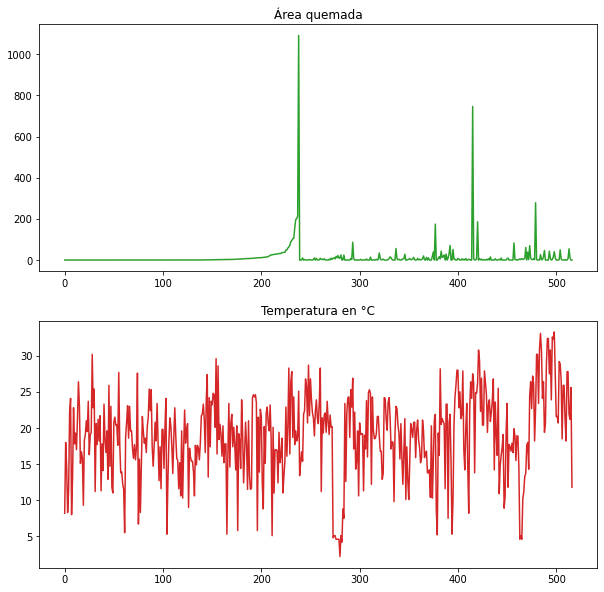

In [5]:
fig, axs = plt.subplots(2, figsize=(10,10))
axs[0].plot(dataset['area'],'tab:green')
axs[0].set_title('Área quemada')
axs[1].plot(dataset['temp'], 'tab:red')
axs[1].set_title('Temperatura en °C')

In [6]:
print('Número de instancias: %s'%len(dataset))
print('Número de atributos: %s'%(dataset.shape[1]))

Número de instancias: 517
Número de atributos: 13


# 5. Dividir el conjunto de datos en k conjuntos de entrenamiento y prueba

In [7]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf.get_n_splits(X)
print(kf)

KFold(n_splits=5, random_state=None, shuffle=False)


Visualización de los índices de los k conjuntos de entrenamiento y prueba

In [9]:
for train_index, test_index in kf.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301
 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319
 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337
 338 339 340 341 342 343 344 345 346 347 348

In [11]:
print(f'Dimension  de los conjuntos de entrenamiento {X_train.shape}')
print(f'Dimension de los conjuntos de prueba {X_test.shape}')

Dimension  de los conjuntos de entrenamiento (414, 12)
Dimension de los conjuntos de prueba (103, 12)
